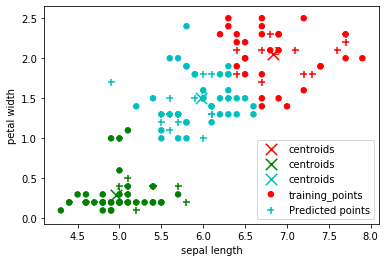

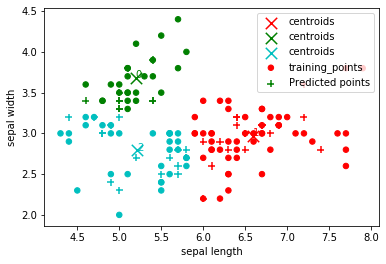

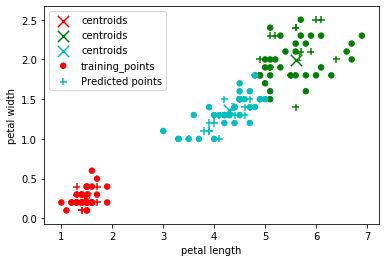

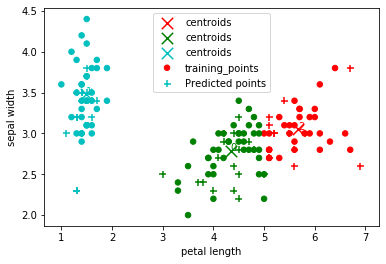

In [43]:
import random
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class Datapoint():
	def __init__(self,array,label=None):
		self.values = array
		self.label = str(label[0])
		self.centroid_label = str(label[0])
	def __repr__(self):
		return ("value: "+str(self.values) + "label: "+ str(self.label))

def load_data(X,Y,plot_info):
	dataset = []
	data = X
	target = Y
	target = target.reshape((target.shape[0],1))
	p = data[0][[plot_info[0],plot_info[1]]]
	p=p.reshape(1,len(plot_info))	
	for a in range(len(data)):
		value = data[a][[plot_info[0],plot_info[1]]]
		value = value.reshape(1,len(plot_info))
		p = np.concatenate((p,value),axis=0)
	for a,b in zip(p,target):
		point = Datapoint(a,b)
		dataset.append(point)
	
	return dataset

def split_dataset(dataset,test_size):
	X_train, X_test, y_train, y_test = train_test_split(dataset["data"],dataset["target"],test_size=test_size,stratify=dataset["target"])
	return X_train, X_test, y_train, y_test


class KNN():
	def __init__(self,dataset,k,plot_info):
		self.dataset = dataset
		self.k = k
		self.plot_info = plot_info
		self.centroids = {}
		self.max_iterations = 100
		self.lower_limit = 0.0001
		self.clusters = {}
		self.target_variable = []
		centroid_values =[]
		for point in self.dataset:
			if point.centroid_label not in self.target_variable and list(point.values) not in centroid_values:
				self.centroids[point.centroid_label] = point
				centroid_values.append(list(point.values))
				self.target_variable.append(point.centroid_label)

		for i in self.target_variable:
			self.clusters[i] =[]

		self.iterate()

		return


	def euclidean_distance(self,instance_a,instance_b):
		return np.sqrt(sum(np.power(instance_a.values-instance_b.values,2)))

	def assign_cluster(self,dataset):
		for label,cluster in self.clusters.items():
			self.clusters[label] =[]
		frequency ={}
		for point in dataset:
			distances = []
			for label,centroid in self.centroids.items():
				dist = self.euclidean_distance(point,centroid)	#calculating distance based on the features only and not on the label category of the point
				distances.append((dist,label))
			distances.sort(key = lambda x:x[0])
			cluster_identifier = distances[0][1]	
			self.clusters[cluster_identifier].append(point)
			point.centroid_label = str(cluster_identifier)
	
		return

	def update_centroids(self):
		for cluster_label,cluster_points in self.clusters.items():
			new_centroid = Datapoint(np.average([point.values for point in cluster_points],axis = 0),label = cluster_label)
			self.centroids[cluster_label] = new_centroid
		return


		
	def iterate(self):
		for i in range(self.max_iterations):
			self.assign_cluster(self.dataset)
			self.update_centroids()
		self.assign_cluster(self.dataset)	

		return


	def predict_plot(self,input_nd_array):
		plot =[]
		for point in input_nd_array:
			distances =[]
			for label,centroid in self.centroids.items():
				dist = self.euclidean_distance(point,centroid)
				distances.append((dist,centroid.label))
			distances.sort(key = lambda x:x[0])
			cluster_identifier = distances[0][1]
			point.centroid_label = cluster_identifier
			plot.append(point)
		return self.plot_points(plot)
		

	def plot_points(self,a):
		target= {0:"sepal length",
				1: "sepal width",
				2: "petal length",
				3: 'petal width'
		}
		colors = {}
		x,y =[],[]
		color =[]
		slope,c = 0.0,0.0
		target_colors = 10*["r", "g", "c", "b", "k"]
		for i in range(len(self.target_variable)):
			colors[self.target_variable[i]] = target_colors[i]
		plt.figure()
		for label,centroid in self.centroids.items():
			plt.scatter(centroid.values[0],centroid.values[1], color = colors[label],s = 130, marker = "x",label = "centroids")
			plt.text(centroid.values[0],centroid.values[1],label, color = colors[label], fontsize =10)

		p =[]
		for label,cluster in self.clusters.items():
			for point in cluster:
				x.append(point.values[0])
				y.append(point.values[1])
				color.append(colors[point.centroid_label])
		plt.scatter(x,y, color = color, s = 30, marker = 'o',label = "training_points")
		x,y,color =[],[],[]
		for point in a:
			x.append(point.values[0])
			y.append(point.values[1])
			color.append(colors[point.centroid_label])
		plt.scatter(x,y,s = 50,marker = "+" ,color = color,label = "Predicted points")
		plt.legend()
		plt.xlabel(target[self.plot_info[0]])
		plt.ylabel(target[self.plot_info[1]])
		plt.show()
		return True

if __name__ == '__main__':
	features_index = [(0,3),(0,1),(2,3),(2,1)]
	iris = datasets.load_iris()
	for index_of_features_to_plot in features_index: 
		X_train, X_test, y_train, y_test = split_dataset(iris,test_size=0.3)
		train_data = load_data(X_train,y_train,index_of_features_to_plot)
		plot_test_data = load_data(X_test,y_test,index_of_features_to_plot)
		knn = KNN(train_data,3,index_of_features_to_plot)
		knn.predict_plot(plot_test_data)
